In [1]:
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 11.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [7]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [10]:
emolex_df.tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
import spacy
nlp = spacy.load('el_core_news_sm')

#tweets analysis

In [12]:
full_tweets_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/fuel.tsv", sep='\t')

In [13]:
len(full_tweets_df)

4000

In [14]:
short_tweets = full_tweets_df[['created_at','text' ]]
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'text': 'text'} )

In [15]:
short_tweets.tail()

,date,text
3995,Mon Jun 27 05:47:58 +0000 2022,RT @alexan00075437: Βάζω 50 ευρώ βενζίνη και τ...
3996,Mon Jun 27 05:47:48 +0000 2022,RT @Wm9NdjRMup1YFOo: Ήρθαν στην Εξουσία υποσχό...
3997,Mon Jun 27 05:46:04 +0000 2022,RT @alexan00075437: Βάζω 50 ευρώ βενζίνη και τ...
3998,Mon Jun 27 05:43:46 +0000 2022,eXofitsio: Λαβρόφ: Θα σταματήσουμε όταν η βεν...
3999,Mon Jun 27 05:43:14 +0000 2022,Ήρθαν στην Εξουσία υποσχόμενοι την άνοδο του β...


In [16]:
short_tweets.dtypes

date    object
text    object
dtype: object

In [18]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [19]:
short_tweets.dtypes

date    datetime64[ns]
text            object
dtype: object

In [20]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [21]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [22]:
short_tweets.head()

,date,text
0,2022-06-30 09:53:07,"RT @Tsiribibom: Έβαλα βενζίνη με 2,29 και νιώθ..."
1,2022-06-30 09:51:50,RT @TheSokrates: Ο άλλος ζήτησε να του βαλουν ...
2,2022-06-30 09:50:05,RT @TheSokrates: Ο άλλος ζήτησε να του βαλουν ...
3,2022-06-30 09:43:32,RT @TheSokrates: Ο άλλος ζήτησε να του βαλουν ...
4,2022-06-30 09:43:24,"RT @spirosmous: Δεν αντέχω άλλο,ετσι μου ρχετα..."


In [24]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [25]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#                strip_accents = 'unicode', 
#                token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#                stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(short_tweets['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
wordcount_df.shape

(4000, 13161)

In [27]:
emolex_df.head()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
emolex_df[emolex_df.Anger == 1].tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,13104,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,13106,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,13110,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,13138,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [29]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [30]:
short_tweets.head(3)

,date,text
0,2022-06-30 09:53:07,"RT @Tsiribibom: Έβαλα βενζίνη με 2,29 και νιώθ..."
1,2022-06-30 09:51:50,RT @TheSokrates: Ο άλλος ζήτησε να του βαλουν ...
2,2022-06-30 09:50:05,RT @TheSokrates: Ο άλλος ζήτησε να του βαλουν ...


In [31]:
short_tweets['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets['disgust'] = wordcount_df[disgust_words].sum(axis=1)



short_tweets['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets['fear'] = wordcount_df[fear_words].sum(axis=1)

In [32]:
short_tweets

,date,text,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2022-06-30 09:53:07,"RT @Tsiribibom: Έβαλα βενζίνη με 2,29 και νιώθ...",0,0,0,0,0,1,0,0,0,0
1,2022-06-30 09:51:50,RT @TheSokrates: Ο άλλος ζήτησε να του βαλουν ...,0,0,0,0,0,0,0,0,0,0
2,2022-06-30 09:50:05,RT @TheSokrates: Ο άλλος ζήτησε να του βαλουν ...,0,0,0,0,0,0,0,0,0,0
3,2022-06-30 09:43:32,RT @TheSokrates: Ο άλλος ζήτησε να του βαλουν ...,0,0,0,0,0,0,0,0,0,0
4,2022-06-30 09:43:24,"RT @spirosmous: Δεν αντέχω άλλο,ετσι μου ρχετα...",0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2022-06-27 05:47:58,RT @alexan00075437: Βάζω 50 ευρώ βενζίνη και τ...,0,0,0,0,0,1,0,0,1,0
3996,2022-06-27 05:47:48,RT @Wm9NdjRMup1YFOo: Ήρθαν στην Εξουσία υποσχό...,0,1,0,0,0,1,0,0,0,0
3997,2022-06-27 05:46:04,RT @alexan00075437: Βάζω 50 ευρώ βενζίνη και τ...,0,0,0,0,0,1,0,0,1,0
3998,2022-06-27 05:43:46,eXofitsio: Λαβρόφ: Θα σταματήσουμε όταν η βεν...,0,0,0,0,0,0,0,0,0,0


In [33]:
short_tweets.set_index('date' , inplace=True)

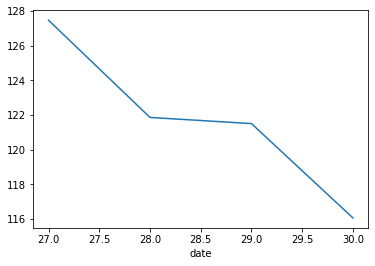

In [34]:
short_tweets['text'].str.len().groupby(by=short_tweets.index.day).mean().plot() 

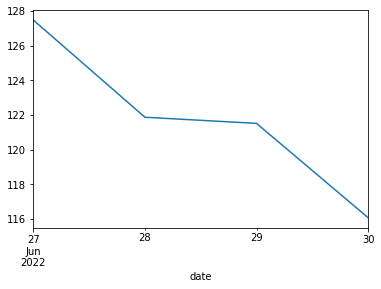

In [35]:
short_tweets['text'].str.len().resample('C').mean().plot()

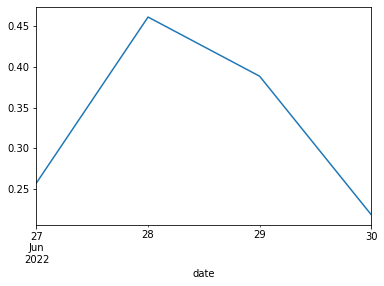

In [36]:
short_tweets['positivity'].resample('C').mean().plot() 

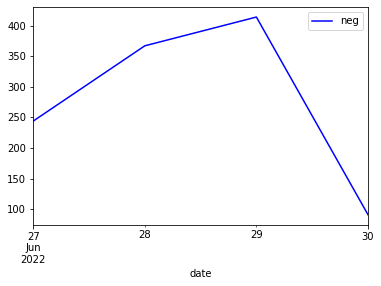

In [37]:
short_tweets['negative'].resample('C').sum().plot(color = 'b',label = 'neg').legend() 

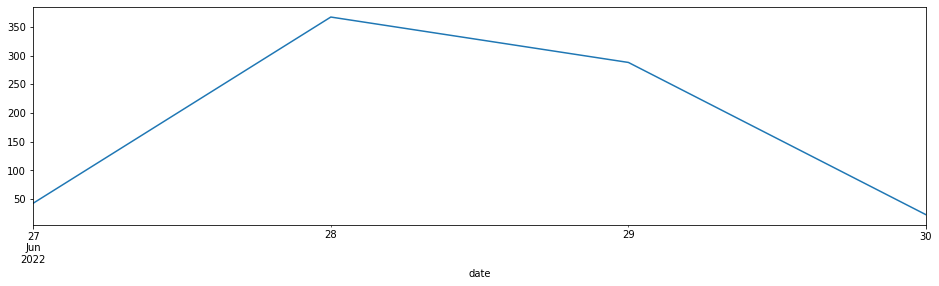

In [38]:
short_tweets['anger'].resample('C').sum().plot(figsize=(16,4))

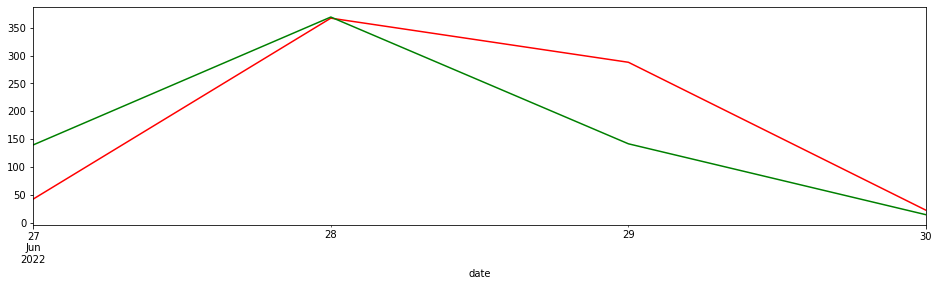

In [39]:
ax = short_tweets['anger'].resample('C').sum().plot(figsize=(16,4), color = 'red')
short_tweets['joy'].resample('C').sum().plot(figsize=(16,4), ax = ax, color = 'green')

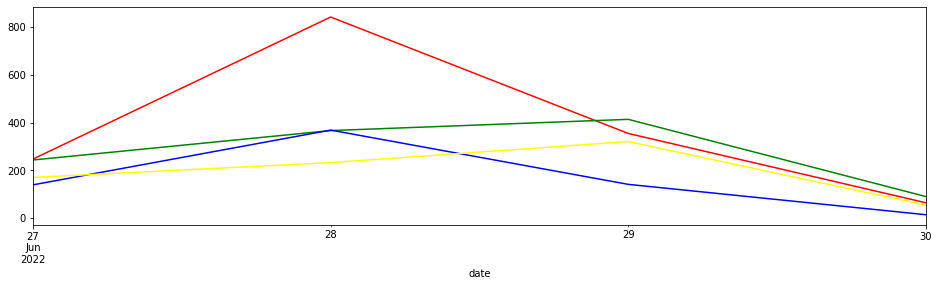

In [40]:
ax = short_tweets['positivity'].resample('C').sum().plot(figsize=(16,4), color = 'red')
short_tweets['negative'].resample('C').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_tweets['joy'].resample('C').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
short_tweets['fear'].resample('C').sum().plot(figsize=(16,4), ax = ax, color = 'yellow')

In [41]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

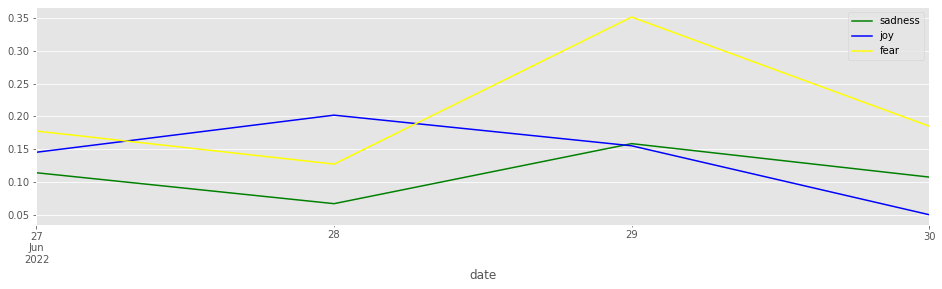

In [42]:
ax = short_tweets['sadness'].resample('C').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='sadness')
short_tweets['joy'].resample('C').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'joy',color = 'blue')
short_tweets['fear'].resample('C').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'fear',color = 'yellow').legend()

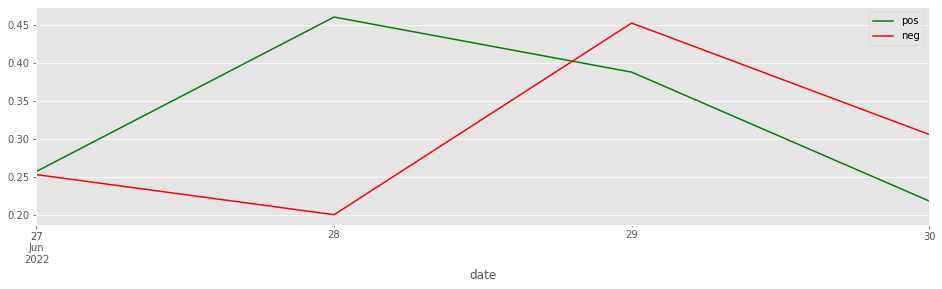

In [43]:
ax = short_tweets['positivity'].resample('C').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets['negative'].resample('C').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r').legend()